**Let's grow More (LGMVIP)- Data Science Intern**

Author - Vaishnavi Darade

Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM

Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Importing dataset

In [2]:
df=pd.read_csv("../input/nsetataglobal/NSE-TATAGLOBAL.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


Plotting the value of every x with respect to y

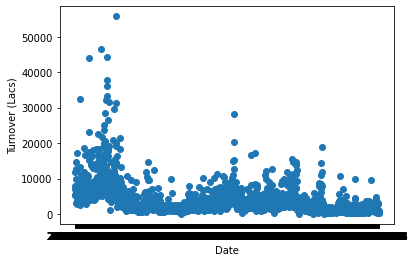

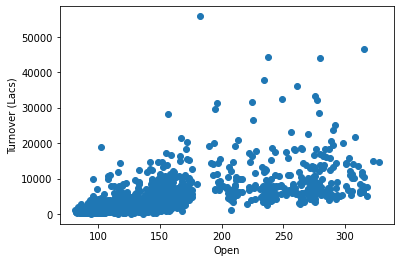

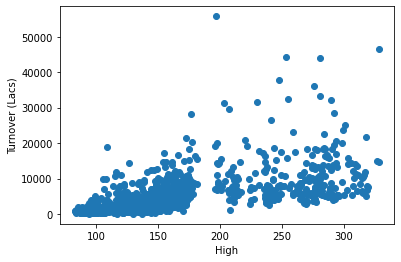

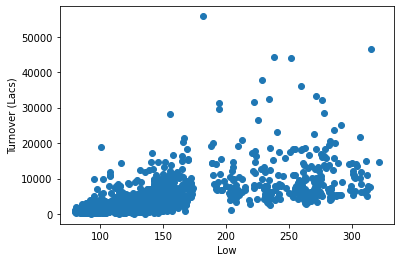

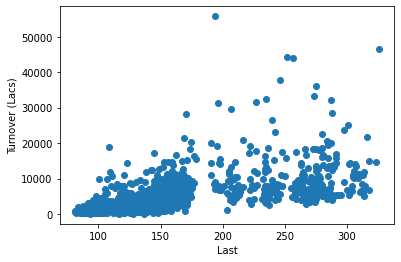

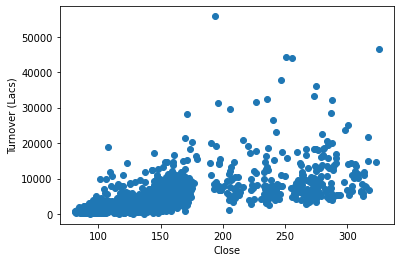

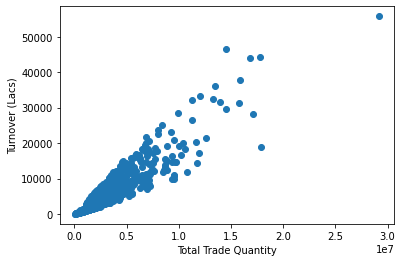

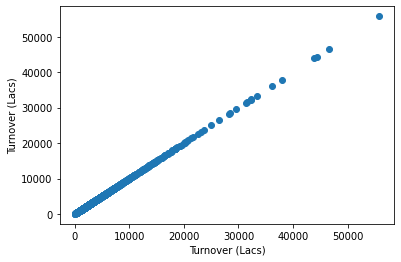

In [4]:
import matplotlib.pyplot as plt
for i in df:
    x = df[i]
    y = df['Turnover (Lacs)']
    plt.scatter(x,y)
    plt.xlabel(i)
    plt.ylabel('Turnover (Lacs)')
    plt.show()
    print("\n")

Heatmap

<AxesSubplot:>

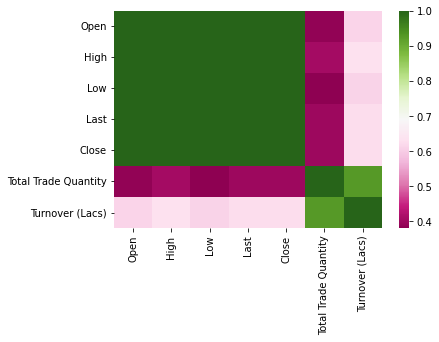

In [5]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="PiYG")

Defining the value of x and y

In [6]:
x=df.drop(['Date','Turnover (Lacs)'],axis=1)
y=df['Turnover (Lacs)']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 47)

Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train,y_train)
model_Train_pred=model.predict(X_train)
model_pred=model.predict(X_test)
modelfinal=model

from sklearn.metrics import mean_absolute_error
errorstr = mean_absolute_error(y_train,model_Train_pred)
errorste = mean_absolute_error(y_test, model_pred)
print('\nmae(On train,On test)=',(errorstr,errorste))

from sklearn.metrics import r2_score
r2tr = r2_score(y_train,model_Train_pred)
r2te = r2_score(y_test, model_pred)
print('\nR2(On train,On test)=',(r2tr,r2te))


mae(On train,On test)= (679.8381210029703, 701.4032221353694)

R2(On train,On test)= (0.9398053590123997, 0.9207334159923733)


Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(X_train,y_train)
model_Train_pred=model.predict(X_train)
model_pred=model.predict(X_test)
modelfinal=model

from sklearn.metrics import mean_absolute_error
errorstr = mean_absolute_error(y_train,model_Train_pred)
errorste = mean_absolute_error(y_test, model_pred)
print('\nmae(On train,On test)=',(errorstr,errorste))

from sklearn.metrics import r2_score
r2tr = r2_score(y_train,model_Train_pred)
r2te = r2_score(y_test, model_pred)
print('\nR2(On train,On test)=',(r2tr,r2te))


mae(On train,On test)= (48.96461455773931, 123.2043771498773)

R2(On train,On test)= (0.9960732750978206, 0.9552010726607062)


Scaling the values

In [10]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
mmscaler.fit(x)
x = mmscaler.transform(x)

Standardization of values

In [11]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(x)
x = sscaler.transform(x)

Train-Test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 47)

Random forest Classifier after scaling and standardization

In [13]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(X_train,y_train)
model_Train_pred=model.predict(X_train)
model_pred=model.predict(X_test)
modelfinal=model

from sklearn.metrics import mean_absolute_error
errorstr = mean_absolute_error(y_train,model_Train_pred)
errorste = mean_absolute_error(y_test, model_pred)
print('\nmae(On train,On test)=',(errorstr,errorste))

from sklearn.metrics import r2_score
r2tr = r2_score(y_train,model_Train_pred)
r2te = r2_score(y_test, model_pred)
print('\nR2(On train,On test)=',(r2tr,r2te))


mae(On train,On test)= (50.384250982800886, 116.29020393120398)

R2(On train,On test)= (0.9947333779649792, 0.9600924512040533)


MAE appears to be high as values are very large and prediction may vary at 1/10th, 1/100th scale. Still, observing y variables we can say this value of MAE is very less and model has very nice R2 score, so we can say that this is a very nice prediction model.

In [14]:
def classifier(I):
    print(I)
    I= mmscaler.transform(I)
    print(I)
    I= sscaler.transform(I)
    print(I)
    y_pred=model.predict(I)
    print(y_pred)


Predicting the new values

In [15]:
classifier([[233.3,236.75,232,236.25,236.1,2349368]])

[[233.3, 236.75, 232, 236.25, 236.1, 2349368]]
[[0.61719384 0.62594023 0.6290089  0.63380282 0.63378268 0.07923316]]
[[1.71802431 1.7156987  1.76764924 1.7810897  1.77925266 0.00654465]]
[5457.4947]
